## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
score = pd.read_csv('../data/combined_score.csv')
total = pd.read_csv('../data/combined_total.csv')

# EDA

In [4]:
score['characters'] = score['title'].str.len()
total['characters'] = total['title'].str.len()

Creating a character column out of curiousity

In [5]:
total.drop('created_utc', axis = 1).groupby('subreddit').describe().transpose().apply(lambda s: s.apply(lambda x: format(x, 'g')))

# lambda function from: https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

subreddit        ShittyTodayILearned todayilearned
score      count                6573          6573
           mean              22.3896       75.5944
           std               33.2278       1515.91
           min                     0             0
           25%                     1             1
           50%                     7             1
           75%                    32             1
           max                   289         56427
words      count                6573          6573
           mean              17.0242       29.5568
           std               9.37377       13.6343
           min                     7             7
           25%                    10            18
           50%                    14            28
           75%                    21            41
           max                    72            62
characters count                6573          6573
           mean              93.7651       170.752
           std               53.7143        79.661
           min                    23            27
           25%                    55           102
           50%                    78           162
           75%                   115           242
           max                   300           310

In [6]:
score.drop('created_utc', axis = 1).groupby('subreddit').describe().transpose().apply(lambda s: s.apply(lambda x: format(x, 'g')))

# lambda function from: https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

subreddit        ShittyTodayILearned todayilearned
score      count                2958          2958
           mean              47.0527       1622.36
           std                36.617       8387.06
           min                    10            10
           25%                    20            23
           50%                    37            61
           75%                    61           183
           max                   289        129640
words      count                2958          2958
           mean              16.7072       32.8127
           std               9.15246       12.8418
           min                     7             7
           25%                    10            22
           50%                    14            33
           75%                    20            44
           max                    63            61
characters count                2958          2958
           mean              91.6308        190.91
           std               52.3334       74.9759
           min                    23            32
           25%                 54.25           129
           50%                    76         189.5
           75%                   111           259
           max                   300           312

Creating these as I may make use of these in presentation/readme

## Top words

In [7]:
til = pd.read_csv('../data/til_curate.csv')
stil = pd.read_csv('../data/stil_clean.csv')

Using the seperated datasets will make it simpler

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(('til', 'todayilearned', 'til:', 'stil', 'shittytodayilearned', 'stil:', '000', 'us', 'would', 'also', 'like', 'get', 'make', 'made', 'used', 'still', 'use', 'used', 'since', 'even', 'never', 'today', 'learned', 'way', 'amp'))

Removing words that don't provide insight into the subreddits

In [9]:
cvec = CountVectorizer(stop_words = stopwords)
Xt = cvec.fit_transform(til['title'])
edat = pd.DataFrame(Xt.todense(), columns = cvec.get_feature_names())
Xs = cvec.fit_transform(stil['title'])
edas = pd.DataFrame(Xs.todense(), columns = cvec.get_feature_names())

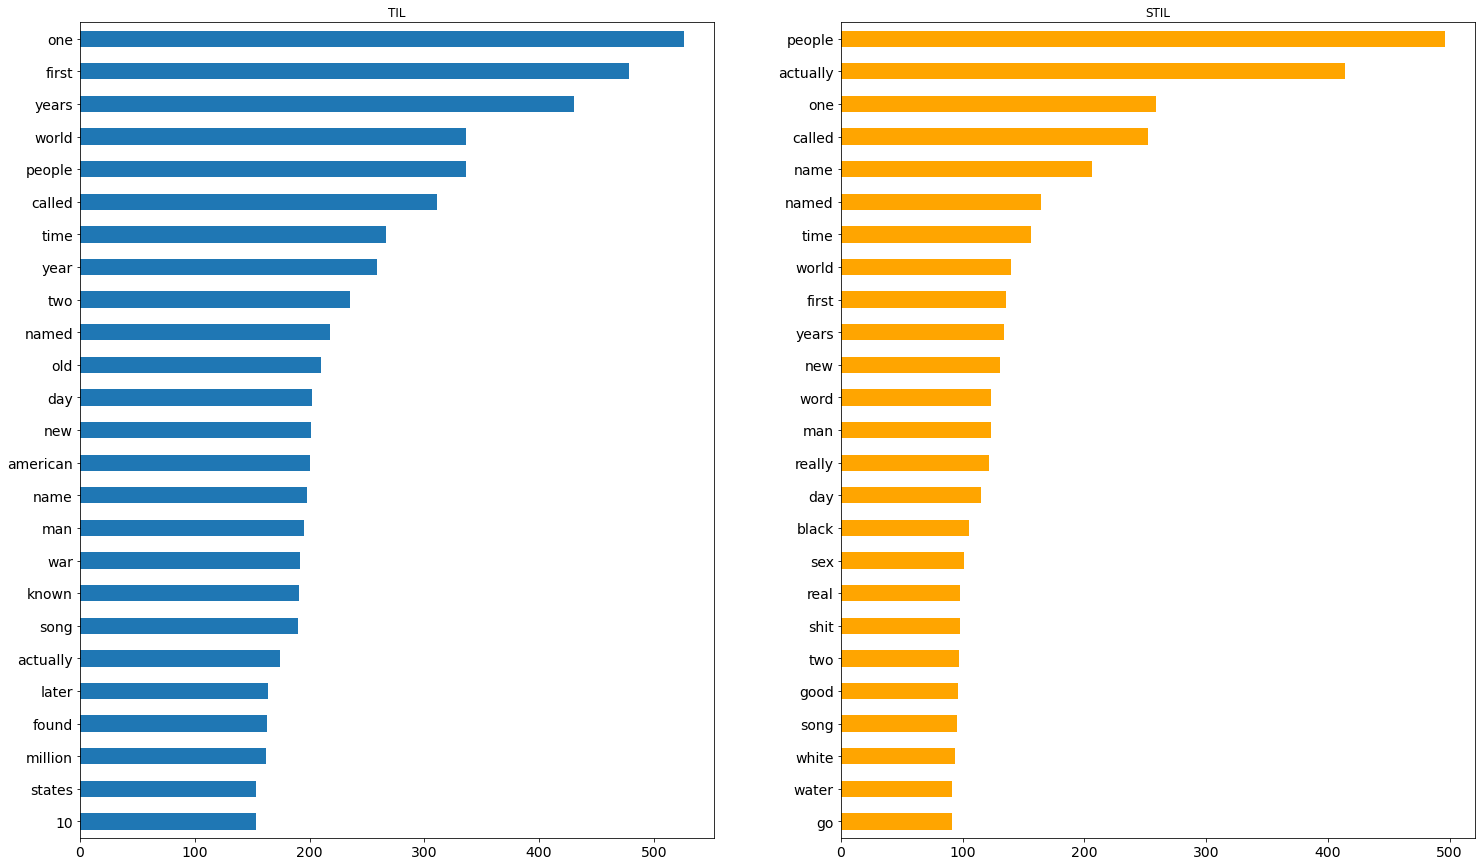

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(25, 15));

edat.sum().sort_values().tail(25).plot(kind='barh', ax=ax[0], title = 'TIL', fontsize = 14);
edas.sum().sort_values().tail(25).plot(kind='barh', ax=ax[1], title = 'STIL', fontsize = 14, color = 'orange');

plt.savefig('../images/word_total')

In [11]:
til10 = pd.read_csv('../data/til10_curate.csv')
stil10 = pd.read_csv('../data/stil10.csv')

Now doing the same for Method 2

In [12]:
Xt10 = cvec.fit_transform(til10['title'])
edat10 = pd.DataFrame(Xt10.todense(), columns = cvec.get_feature_names())
Xs10 = cvec.fit_transform(stil10['title'])
edas10 = pd.DataFrame(Xs10.todense(), columns = cvec.get_feature_names())

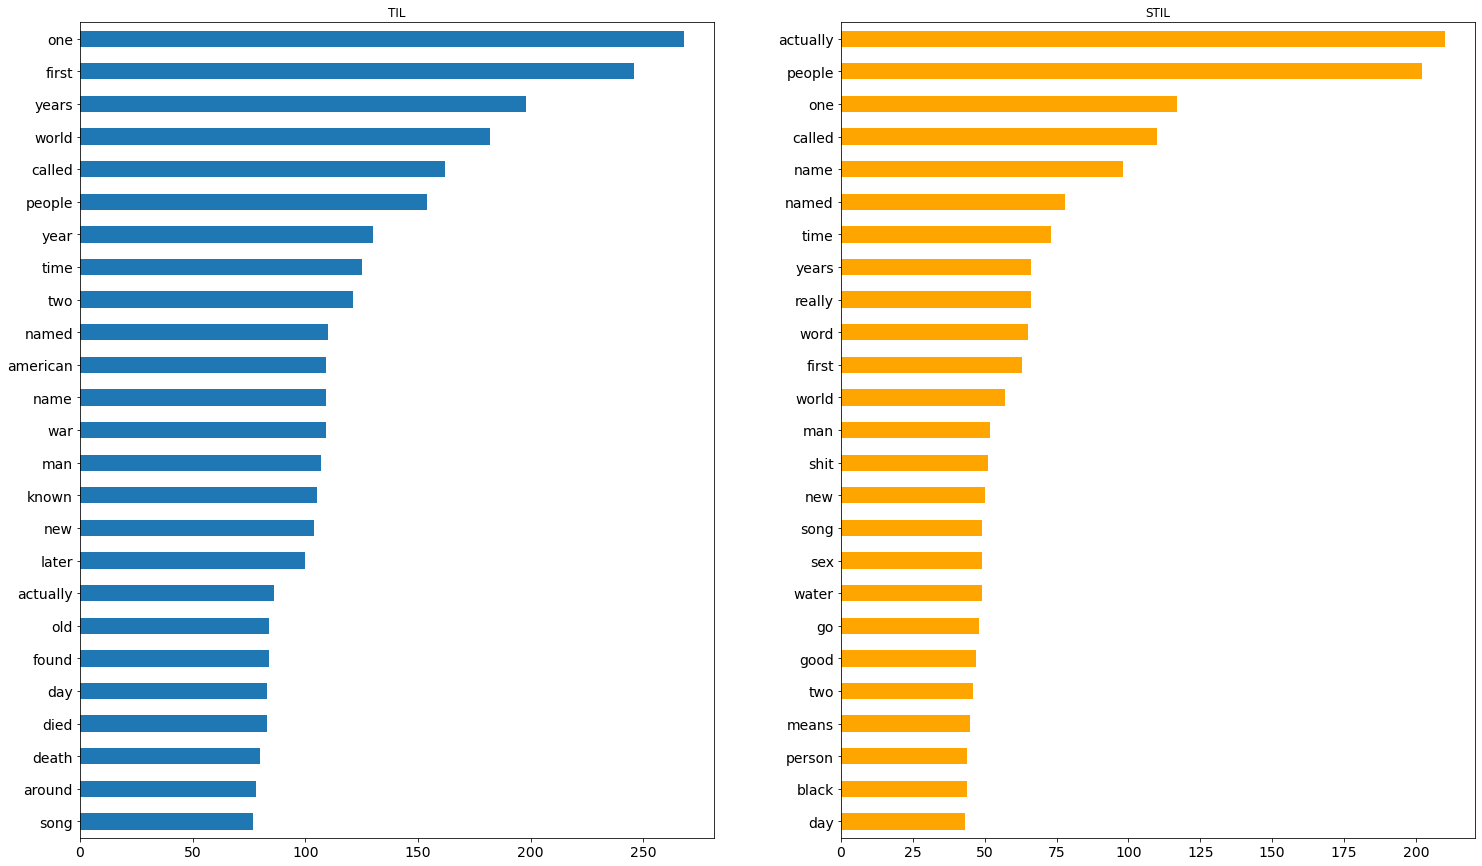

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(25, 15));

edat10.sum().sort_values().tail(25).plot(kind='barh', ax=ax[0], title = 'TIL', fontsize = 14);
edas10.sum().sort_values().tail(25).plot(kind='barh', ax=ax[1], title = 'STIL', fontsize = 14, color = 'orange');

plt.savefig('../images/word_10')

## Comparison Graphs

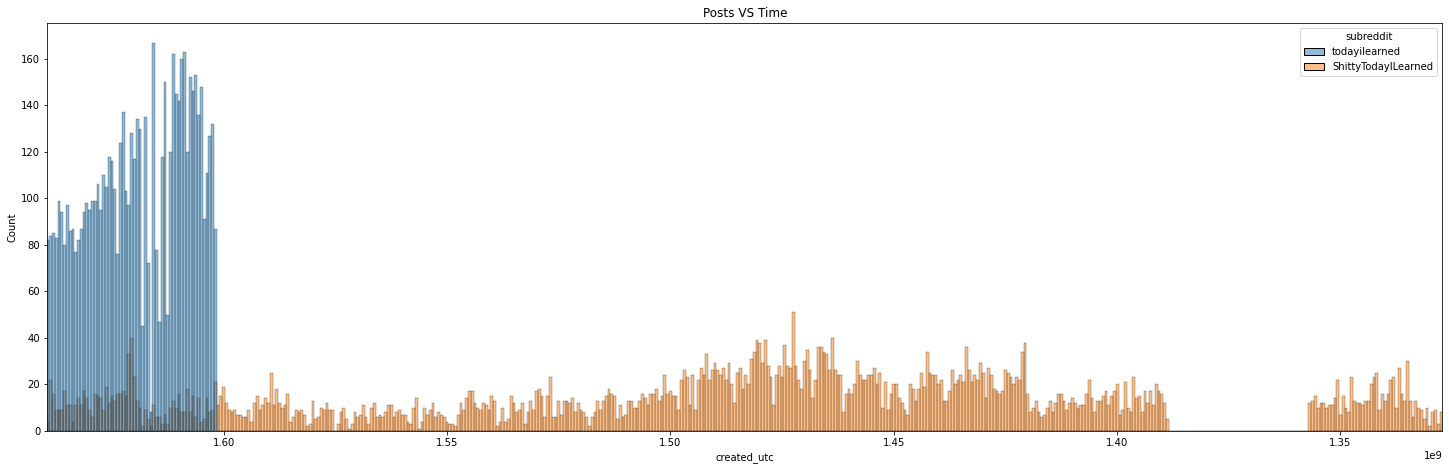

In [14]:
plt.figure(figsize = (25, 7.5))

ax = sns.histplot(data = total,
    x = 'created_utc',      
    hue = 'subreddit',         
    bins = 500,           
   );

ax.set_xlim(1327125514, 1639505768)
ax.invert_xaxis()
ax.set_title('Posts VS Time')

plt.savefig('../images/histo')

Important to know posts aren't equal over time

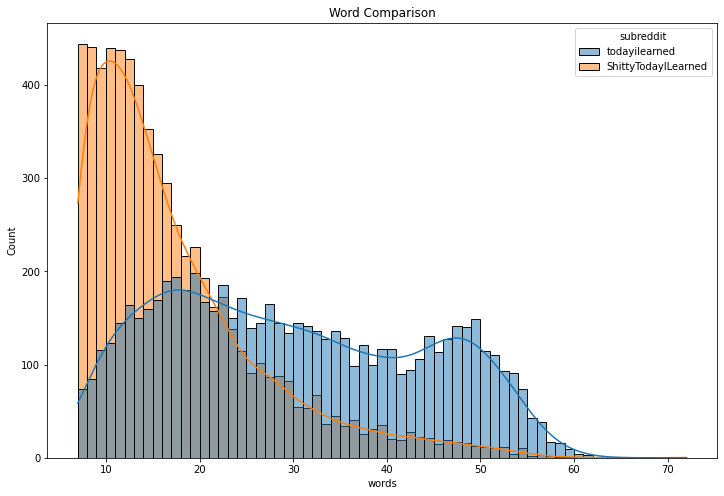

In [15]:
plt.figure(figsize = (12, 8))

ax = sns.histplot(data = total,
    x = 'words',      
    hue = 'subreddit',         
    binwidth = 1,
    kde = True              
   );

ax.set_title('Word Comparison')

plt.savefig('../images/word_histo')

Also important to compare word count. Character graph is almost exactly the same and redundant information